**Input Layer:**
- The input layer is where the data enters the neural network.
- Each "neuron" in the input layer corresponds to one feature of your data (e.g., pixel intensity for an image, numerical values for structured data, etc.).
- The input layer does not perform any computations; it simply passes the data to the next layer.

**Hidden Layers**:
- The hidden layers are where the math happens. These layers transform the input data into more meaningful representations that are useful for the task.

What happens here?
- Each neuron in a hidden layer computes a weighted sum of its inputs, adds a bias term, and applies an activation function.
- The activation functions introduce non-linearity, allowing the network to learn complex patterns.
- These layers work collectively to approximate functions and identify patterns in the data.
Why "hidden"?
- They’re called "hidden" because their outputs aren’t directly observed—they’re intermediate computations.

**Output Layer** :

The output layer produces the final predictions.

What happens here?

The neurons in the output layer combine the information from the hidden layers and produce a meaningful output based on the task:
- Regression tasks: Output is a single number (e.g., predicting a house price).
- Binary classification: Output is a single value between 0 and 1 (e.g., using a sigmoid activation).
- Multi-class classification: Output is a probability distribution across classes (e.g., using a softmax activation).

In [ ]:
# ! pip install numpy 

### Import the necessary libraries

In [1]:
import numpy as np

### Sigmoid function

In [2]:
def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

### Derivative of Sigmoid function

In [3]:
def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

### Loss function

In [4]:
def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

### Neural Network Class

In [5]:
class MyNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))

### Define the dataset

In [6]:
# Define dataset, classify gender
data = np.array([
  [0, 2],  # Alice
  [30, 50],   # Bob
  [17, 30],   # Charlie
  [1, 2], # Diana
])
all_y_trues = np.array([
  0, # Alice
  1, # Bob
  1, # Charlie
  0, # Diana
])

### Train our neural network!

In [7]:
network = MyNeuralNetwork()
network.train(data, all_y_trues)

Epoch 0 loss: 0.242
Epoch 10 loss: 0.211
Epoch 20 loss: 0.184
Epoch 30 loss: 0.159
Epoch 40 loss: 0.142
Epoch 50 loss: 0.128
Epoch 60 loss: 0.114
Epoch 70 loss: 0.102
Epoch 80 loss: 0.092
Epoch 90 loss: 0.083
Epoch 100 loss: 0.074
Epoch 110 loss: 0.067
Epoch 120 loss: 0.061
Epoch 130 loss: 0.056
Epoch 140 loss: 0.051
Epoch 150 loss: 0.047
Epoch 160 loss: 0.044
Epoch 170 loss: 0.040
Epoch 180 loss: 0.038
Epoch 190 loss: 0.035
Epoch 200 loss: 0.033
Epoch 210 loss: 0.031
Epoch 220 loss: 0.029
Epoch 230 loss: 0.027
Epoch 240 loss: 0.026
Epoch 250 loss: 0.025
Epoch 260 loss: 0.023
Epoch 270 loss: 0.022
Epoch 280 loss: 0.021
Epoch 290 loss: 0.020
Epoch 300 loss: 0.019
Epoch 310 loss: 0.019
Epoch 320 loss: 0.018
Epoch 330 loss: 0.017
Epoch 340 loss: 0.016
Epoch 350 loss: 0.016
Epoch 360 loss: 0.015
Epoch 370 loss: 0.015
Epoch 380 loss: 0.014
Epoch 390 loss: 0.014
Epoch 400 loss: 0.013
Epoch 410 loss: 0.013
Epoch 420 loss: 0.013
Epoch 430 loss: 0.012
Epoch 440 loss: 0.012
Epoch 450 loss: 0.011

### Make some predictions

In [8]:
emily = np.array([-7, -3]) 
frank = np.array([20, 2])
bob = np.array([-20, -20])  

print("Emily: %.3f" % network.feedforward(emily)) # 0.968 = 1 = F
print("Frank: %.3f" % network.feedforward(frank)) # 0.039 = 0 = M
print("Bob: %.3f" % network.feedforward(bob)) # 0.951 = 1 = F

Emily: 0.028
Frank: 0.929
Bob: 0.007


In [9]:
def predict_class(output):
    return 1 if output > 0.5 else 0

def predict_gender(value):
    return 'male' if value == 0 else 'female'

In [10]:
predict_gender(network.feedforward(emily))

'female'

In [12]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Define the model
model = Sequential()

# Hidden layer with 2 neurons, input_dim=2 as we have 2 input features
model.add(Dense(units=2, input_dim=2, activation='sigmoid'))

# Output layer with 1 neuron
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.1), loss='mean_squared_error')

# Example data and labels (replace this with your actual data)
data = np.array([[0, 1], [1, 0], [1, 1], [0, 0]])
all_y_trues = np.array([0, 1, 1, 0])

# Train the model
model.fit(data, all_y_trues, epochs=1000, verbose=1)

Epoch 1/1000


c:\Users\Tommy\anaconda3\envs\machine_learning\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - loss: 0.2486
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2478
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2471
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2463
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2456
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2449
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2442
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2435
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2428
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2422
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2416
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2410
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2404
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.2398
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2393
Epoch 16/1000
1/

In [17]:
prediction = model.predict(emily.reshape(1, 2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [18]:
print(prediction)
print(predict_gender(prediction))

[[0.09198429]]
female


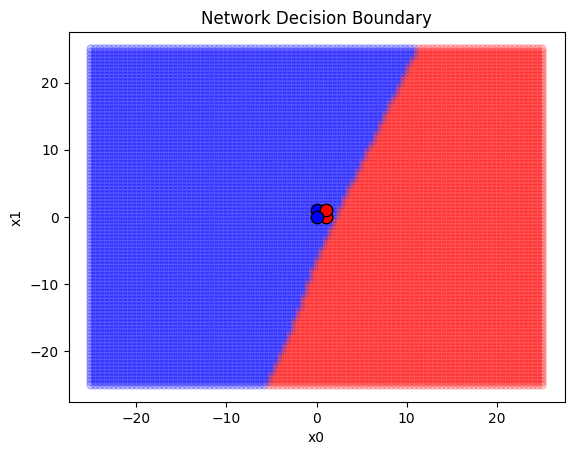

In [19]:
import matplotlib.pyplot as plt

# Create a 2D grid
x_vals = np.linspace(-25, 25, 100)
y_vals = np.linspace(-25, 25, 100)

grid_points = []
for xv in x_vals:
    for yv in y_vals:
        grid_points.append([xv, yv])
grid_points = np.array(grid_points)

# Classify each point
pred_labels = []
for point in grid_points:
    p = network.feedforward(point)
    pred_labels.append(1 if p > 0.5 else 0)
pred_labels = np.array(pred_labels)

# Plot the decision boundary
plt.scatter(grid_points[:, 0], grid_points[:, 1], c=pred_labels, alpha=0.2, cmap='bwr')

# Overlay your training examples
for (xx, yy), label in zip(data, all_y_trues):
    color = 'red' if label == 1 else 'blue'
    plt.scatter(xx, yy, c=color, edgecolors='black', s=80)

plt.xlabel("x0")
plt.ylabel("x1")
plt.title("Network Decision Boundary")
plt.show()
